In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE

# 1. Exploratory Data Analysis and Data Understanding

In [34]:
# Load the dataset
df = pd.read_csv('/content/milknew.csv')

In [35]:
# Display the first 5 rows
print(df.head())

    pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0  6.6          35      1     0     1          0     254    high
1  6.6          36      0     1     0          1     253    high
2  8.5          70      1     1     1          1     246     low
3  9.5          34      1     1     0          1     255     low
4  6.6          37      0     0     0          0     255  medium


In [36]:
# Check the shape of the dataset (rows, columns)
print("Dataset Shape:", df.shape)

Dataset Shape: (1059, 8)


In [37]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB
None


In [38]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64


In [41]:
#Drop duplicates (if any)
df = df.drop_duplicates()
print("Dataset Shape After Dropping Duplicates:", df.shape)

Dataset Shape After Dropping Duplicates: (83, 8)


In [42]:
# Get summary statistics for numerical columns
print("Summary Statistics:\n", df.describe())

Summary Statistics:
               pH  Temprature      Taste       Odor       Fat   Turbidity  \
count  83.000000   83.000000  83.000000  83.000000  83.000000  83.000000   
mean    6.668675   43.698795   0.493976   0.397590   0.602410   0.433735   
std     0.986856    9.379187   0.503003   0.492375   0.492375   0.498602   
min     3.000000   34.000000   0.000000   0.000000   0.000000   0.000000   
25%     6.500000   38.000000   0.000000   0.000000   0.000000   0.000000   
50%     6.600000   41.000000   0.000000   0.000000   1.000000   0.000000   
75%     6.800000   45.000000   1.000000   1.000000   1.000000   1.000000   
max     9.500000   90.000000   1.000000   1.000000   1.000000   1.000000   

           Colour  
count   83.000000  
mean   251.313253  
std      4.577058  
min    240.000000  
25%    247.000000  
50%    255.000000  
75%    255.000000  
max    255.000000  


In [43]:
# Check unique values in the target column (Grade)
print("Unique Values in 'Grade':", df['Grade'].unique())

Unique Values in 'Grade': ['high' 'low' 'medium']


In [44]:
# Summary statistics for the target column (Grade)
print("Target Column Summary:\n", df['Grade'].value_counts())

Target Column Summary:
 Grade
medium    34
low       26
high      23
Name: count, dtype: int64


DATA VISUALIZATION

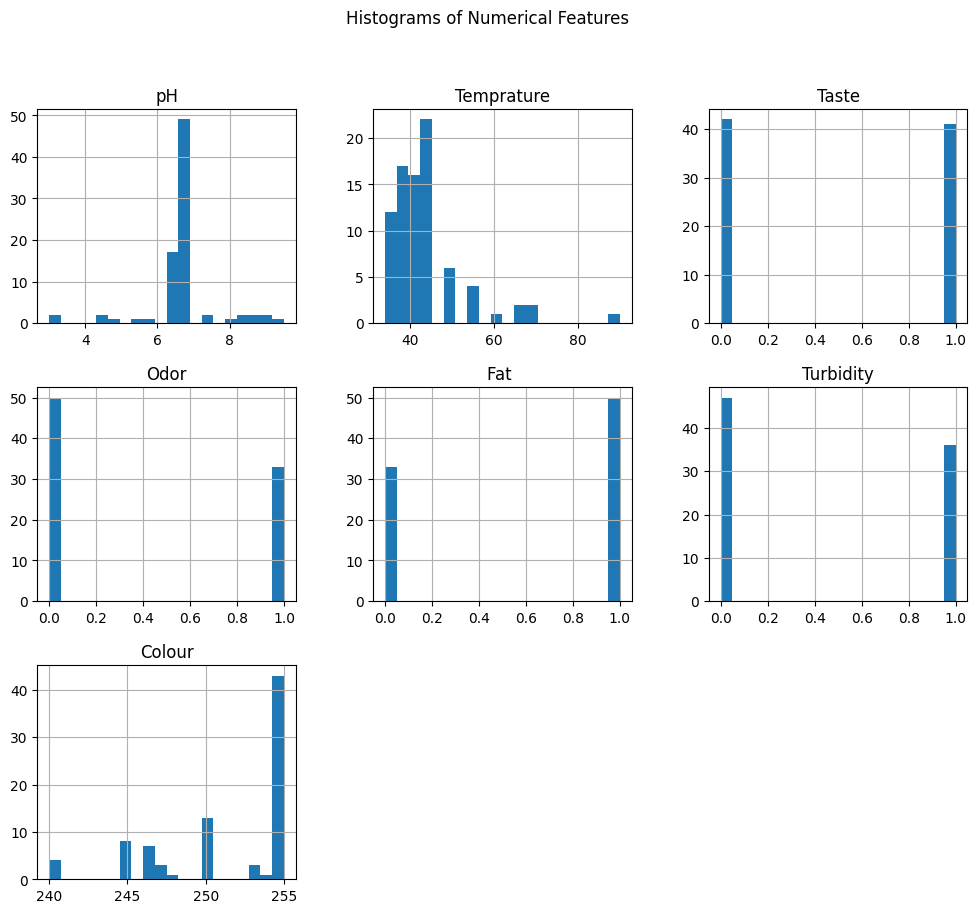

In [45]:
# Plot histograms for all numerical features
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features')  #//////////YET TO UNDERSTAND THE FIG
plt.show()

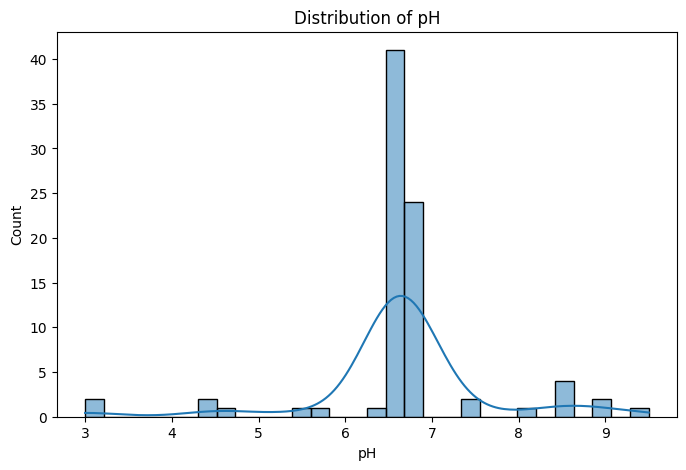

In [46]:
# Visualize the distribution of pH with a histogram and KDE curve
plt.figure(figsize=(8, 5))
sns.histplot(df['pH'], kde=True, bins=30)        #OPT////////???????????
plt.title('Distribution of pH')
plt.xlabel('pH')
plt.ylabel('Count')
plt.show()

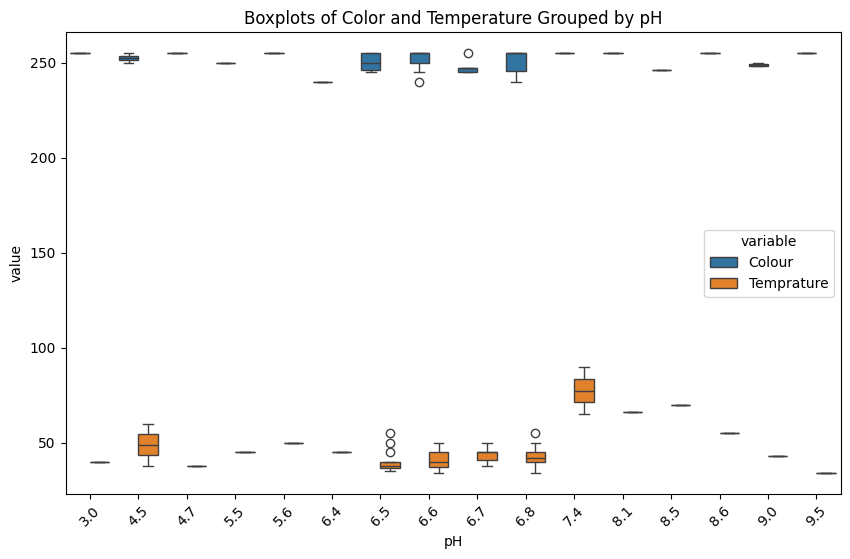

In [47]:
# Plot boxplots for numerical features grouped by pH
selected_features = ['Colour', 'Temprature']
plt.figure(figsize=(10, 6))
df_selected = df.melt(id_vars=['pH'], value_vars=selected_features)
sns.boxplot(x='pH', y='value', hue='variable', data=df_selected)
plt.xticks(rotation=45)
plt.title("Boxplots of Color and Temperature Grouped by pH")
plt.show()

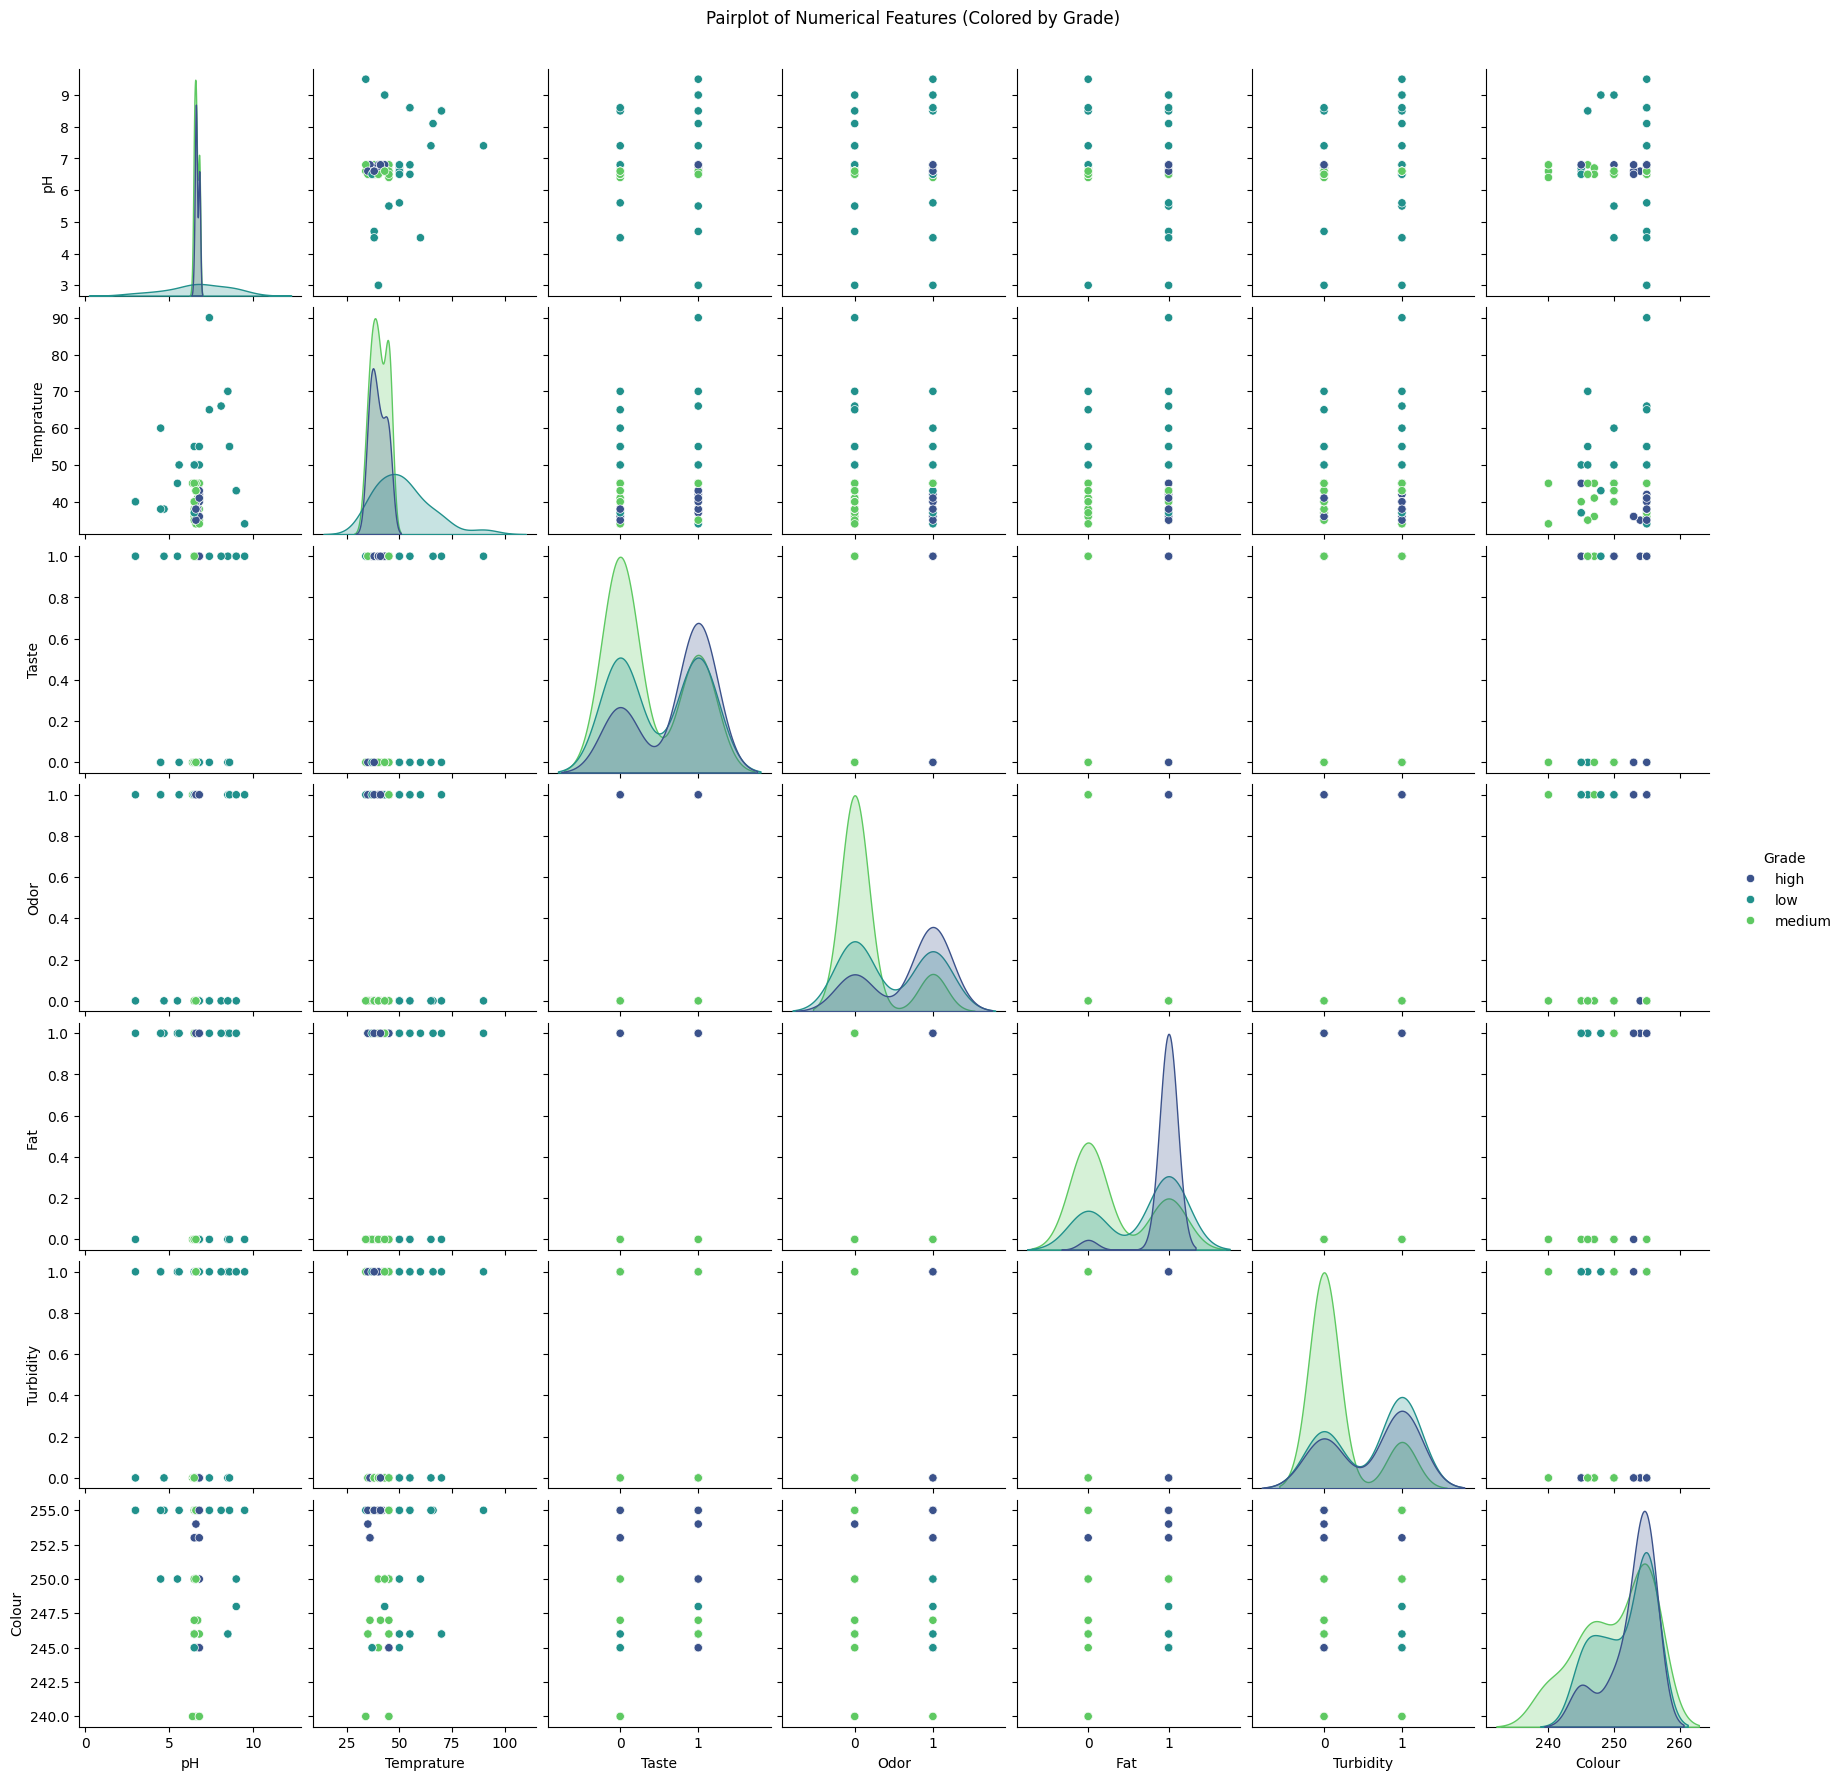

In [48]:
# Pairplot for numerical features, colored by Grade
sns.pairplot(df, hue='Grade', vars=numerical_features, palette='viridis')
plt.suptitle('Pairplot of Numerical Features (Colored by Grade)', y=1.02)
plt.show()

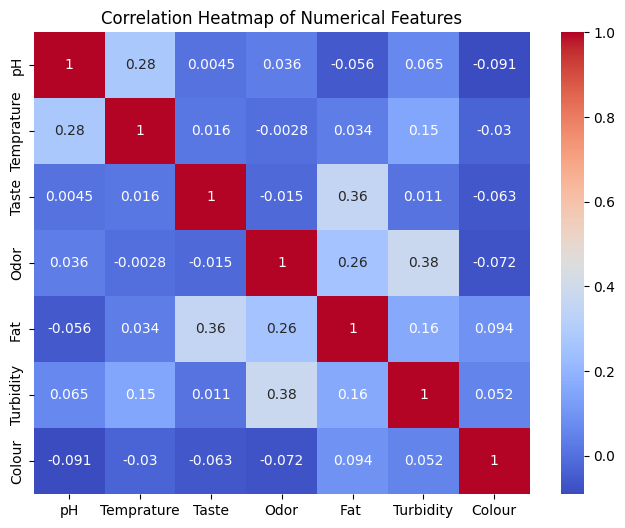

In [49]:
# Plot correlation heatmap for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 2. Build a Model from Scratch (Linear Regression)

In [50]:
# Define features and target variable
X = df[['Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']].values
y = df['pH'].values

# Add bias term (column of ones)
X = np.c_[np.ones(X.shape[0]), X]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute parameters using the Normal Equation
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Make predictions
y_pred_train = X_train @ theta
y_pred_test = X_test @ theta

# Compute MAE (Mean Absolute Error)
mae_train = np.mean(np.abs(y_train - y_pred_train))
mae_test = np.mean(np.abs(y_test - y_pred_test))

# Compute MSE
mse_train = np.mean((y_train - y_pred_train) ** 2)
mse_test = np.mean((y_test - y_pred_test) ** 2)

# Compute RMSE (Root Mean Squared Error)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Compute R² Score
r2_train = 1 - np.sum((y_train - y_pred_train) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2)
r2_test = 1 - np.sum((y_test - y_pred_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)

# Print results
print(f"Training Metrics:")
print(f"MAE: {mae_train:.4f}, MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, R²: {r2_train:.4f}")

print("\nTesting Metrics:")
print(f"MSE: MAE: {mae_test:.4f}, {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

Training Metrics:
MAE: 0.5063, MSE: 0.8595, RMSE: 0.9271, R²: 0.0833

Testing Metrics:
MSE: MAE: 0.6242, 0.9765, RMSE: 0.9882, R²: 0.0448


# 3. BUILD A PRIMARY MODEL (Ridge Regressor & Random Forest Regressor)

In [51]:
# Define features (X) and target variable (y)
# X = df[['Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']]
# y = df['pH']

# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model 1: Ridge Regression

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

### Model 2: Random Forest Regressor

model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

### Evaluation Metrics for Both Models

print("Ridge Regression Performance:")
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mse_ridge ** 0.5
r2_score_ridge = r2_score(y_test, y_pred_ridge)

print(f"MAE: {mae_ridge:.4f}")
print(f"MSE: {mse_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.4f}")
print(f"R^2 Score: {r2_score_ridge:.4f}")

print("\nRandom Forest Regressor Performance:")
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_score_rf = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R^2 Score: {r2_score_rf:.4f}")

### Conclusion on Best Performing Model
if rmse_ridge < rmse_rf:
    print("\nRidge Regression performed better.")
else:
    print("\nRandom Forest Regressor performed better.")

Ridge Regression Performance:
MAE: 0.6219
MSE: 0.9752
RMSE: 0.9875
R^2 Score: 0.0461

Random Forest Regressor Performance:
MAE: 0.7810
MSE: 1.5353
RMSE: 1.2391
R^2 Score: -0.5018

Ridge Regression performed better.


# 4. Hyper-parameter Optimization with Cross-Validation (Using GridSearchCV)

In [52]:
# Define features (X) and target variable (y)
X = df[['Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']]
y = df['pH']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Define hyperparameters for Ridge Regression (an improved form of Linear Regression)
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

# 2. Define hyperparameters for Random Forest Regression
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)

# Get best hyperparameters
ridge_best_params = ridge_grid.best_params_
rf_best_params = rf_grid.best_params_

print(f"Best Ridge Regression Params: {ridge_best_params}")
print(f"Best Random Forest Params: {rf_best_params}")

Best Ridge Regression Params: {'alpha': 100}
Best Random Forest Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


# 5. Feature Selection




In [53]:
# Initialize Ridge Regression model
ridge = Ridge(alpha=1.0)

# Apply RFE to select the top 5 most relevant features
selector = RFE(ridge, n_features_to_select=5)
selector.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[selector.support_]
print("Selected Features for Ridge Regression model:", list(selected_features))

# Initialize the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Apply RFE to select the top 5 most relevant features
selector = RFE(rf, n_features_to_select=5)
selector.fit(X_train, y_train)

# Get selected features
selected_features_rfe_rf = X_train.columns[selector.support_]
print("\nSelected Features for Random Forest model:", list(selected_features_rfe_rf))


Selected Features for Ridge Regression model: ['Temprature', 'Odor', 'Fat ', 'Turbidity', 'Colour']

Selected Features for Random Forest model: ['Temprature', 'Taste', 'Odor', 'Fat ', 'Colour']


# 6. Final Model:

In [54]:
# Use selected features from RFE (for Ridge Regression)
X_train_ridge_final = X_train[selected_features]
X_test_ridge_final = X_test[selected_features]

# Use selected features from RFE with Random Forest
X_train_rf_final = X_train[selected_features_rfe_rf]
X_test_rf_final = X_test[selected_features_rfe_rf]

# 1. Train Ridge Regression with best hyperparameters
ridge_final = Ridge(alpha=ridge_best_params['alpha'])
ridge_final.fit(X_train_ridge_final, y_train)

# 2. Train Random Forest with best hyperparameters
rf_final = RandomForestRegressor(**rf_best_params, random_state=42)
rf_final.fit(X_train_rf_final, y_train)

# Predict on the test set
y_pred_ridge = ridge_final.predict(X_test_ridge_final)
y_pred_rf = rf_final.predict(X_test_rf_final)

# Function to calculate evaluation metrics
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Get evaluation results
ridge_final_results = evaluate_model(y_test, y_pred_ridge)
rf_final_results = evaluate_model(y_test, y_pred_rf)

# Print results
print(f"Final Ridge Regression - MAE: {ridge_final_results[0]}, MSE: {ridge_final_results[1]}, RMSE: {ridge_final_results[1]}, R2: {ridge_final_results[2]}")
print(f"\nFinal Random Forest - MAE: {rf_final_results[0]}, MSE: {rf_final_results[1]}, RMSE: {rf_final_results[1]}, R2: {rf_final_results[2]}")

Final Ridge Regression - MAE: 0.6015336456617384, MSE: 0.9843645325976231, RMSE: 0.9843645325976231, R2: 0.05214814836364845

Final Random Forest - MAE: 0.7753808744696287, MSE: 1.235506286476393, RMSE: 1.235506286476393, R2: -0.4932016705715432


# Conclusion

1.Model Performance:

Ridge Regression outperformed Random Forest in all stages, both before and after hyperparameter tuning and feature selection. Ridge had lower RMSE and higher R² scores, indicating it was better suited for the task.
Random Forest struggled, especially with a negative R² score, suggesting it didn't capture meaningful relationships in the data.

2.Impact of Methods:

Hyperparameter Tuning improved both models, but it had a more significant impact on Ridge Regression, which showed better performance after tuning.
Feature Selection (RFE) helped to reduce features, but it didn't significantly improve Random Forest's performance. For Ridge, it led to a slight improvement.
Insights and Future Directions:
Insights: Ridge Regression's better performance suggests the data may have a linear relationship with the target, while Random Forest may have overcomplicated the task.

3.Insights and Future Directions:

Ridge Regression was the better model, suggesting the data might follow a linear relationship with the target, while Random Forest may have overcomplicated the problem.

Further feature engineering or transformations could improve model performance.
Exploring other models like SVM or Gradient Boosting could potentially yield better results than Random Forest.
Cross-validation and increasing data could improve generalization, and data augmentation might help as well.